<a href="https://colab.research.google.com/github/prince24-web/Mechine_learning/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
Titanic_dataset = '/content/drive/My Drive/Titanic-Dataset.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(Titanic_dataset)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print("Catigotical columns ",cat_col)
print("Numerical columns ",num_col)

Catigotical columns  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


In [ ]:
round(df.isnull().sum()/df.shape[0]*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
df1 = df.drop(columns=['Name','Ticket','Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1.fillna({'Age':df1['Age'].mean()}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


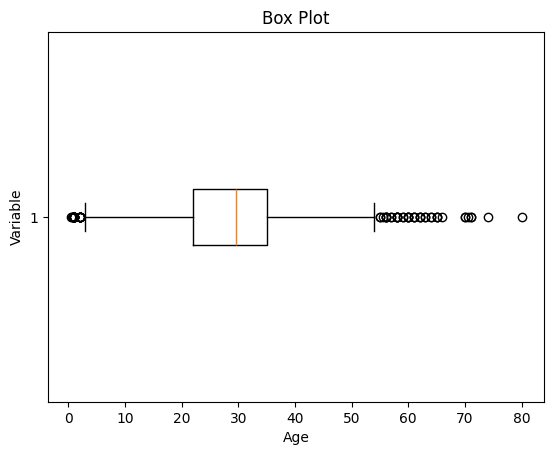

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
mean = df1['Age'].mean()
std = df1['Age'].std()
lower_bound = mean - 2*std
upper_bound = mean + 2*std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

In [ ]:
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
mean = df3['Age'].mean()
std = df3['Age'].std()
lower_bound = mean - 2*std
upper_bound = mean + 2*std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]
df4.info()

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911
<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  762 non-null    int64  
 1   Survived     762 non-null    int64  
 2   Pclass       762 non-null    int64  
 3   Sex          762 non-null    object 
 4   Age          762 non-null    float64
 5   SibSp        762 non-null    int64  
 6   Parch        762 non-null    int64  
 7   Fare         762 non-null    float64
 8   Embarked     762 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 59.5+ KB


In [ ]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
num_col_ = [col for col in X.columns if X[col].dtype != "object"]
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()


/tmp/ipython-input-2661760433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
